In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
def rsvd(A, r):

    # Find the dimensions of A
    m, n = A.shape

    # Find the random projection matrix
    P = np.random.randn(n, r)

    # Find the projection of A onto the random subspace
    Z = A @ P

    # Find the QR decomposition of Z
    Q, _ = np.linalg.qr(Z, mode='reduced')

    # Find the B matrix, which is the projection of A onto Q
    B = Q.T @ A

    # Find the SVD of B
    Uhat, S, V = np.linalg.svd(B, full_matrices=False)

    # Make the U matrix
    U = Q @ Uhat

    return U, S, V

In [7]:
img = cv2.imread('cameraman.png', 0)

In [16]:
u_rsvd, s_rsvd, v_rsvd = rsvd(img, 200)   #target rank = 200
u_svd, s_svd, v_svd = np.linalg.svd(img, full_matrices=False)

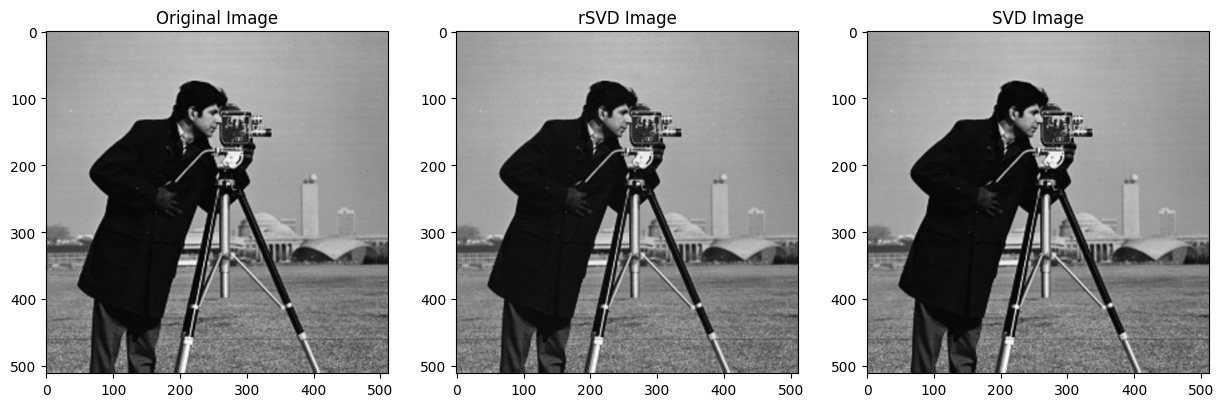

In [18]:
# Plotting both the images side by side

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(u_rsvd @ np.diag(s_rsvd) @ v_rsvd, cmap='gray')
axs[1].set_title('rSVD Image')
axs[2].imshow(u_svd @ np.diag(s_svd) @ v_svd, cmap='gray')
axs[2].set_title('SVD Image')
plt.show()